# Computational Chemistry

This demo aims to introduce how Python can be applied in a Chemistry context. We will focus on reactions and kinetics, by utilising some datasets and analysing them to visualise trends.

The data used in this demo has been taken from this paper: https://www.nature.com/articles/s41557-023-01393-w (King-Smith, E., Berritt, S., Bernier, L. et al. Probing the chemical ‘reactome’ with high-throughput experimentation data. _Nat. Chem._ **16**, 633–643 (2024). https://doi.org/10.1038/s41557-023-01393-w), and the corresponding GitHub repository: https://github.com/emmaking-smith/HiTEA/blob/master/data/8_SEPT_APPROVED_full_dataset.csv (file used is `reaction_screening_data.csv`)

This demo makes use of High Throughput Experimentation (HTE) data, which is data that is essentially produced from screening a very large number of chemical reactions, with varying conditions to determine the best reagents, catalysts and conditions to optimise reaction yield, selectivity and impurity control.

In this demo we will look at a very small sample of this data and only focus on reactions between 2 specific reactants and see what reagent would be most suited to it.

---

# How to use Jupyter

In Jupyter notebooks code can be run cell by cell. Cells are like textboxes which let you input code and comments, and the play button ) lets you run cells individually. The fast forward button ) lets you run the entire notebook. You can also press Shift+Enter to run cells individually.

Some of the cells can be run as they are and others will require you to input some code before running. It will be specified which you need to do.

## Part 1 - reaction data

This part of the demo will focus on a dataset containing reaction data.

The reaction used is the Buchwald-Hartwig reaction, a type of coupling reaction with a palladium catalyst which forms C-N bonds.

This is quite a bit beyond what is covered in A-level but if you would like to find out more about the reaction and its mechanism, visit this link: https://www.sciencedirect.com/science/article/pii/S0022328X18301128.

First, we will import the _libraries_ that we require - these are pre-written packages that have various different functionalities. Most of them are imported in the format `import X as Y`, where `X` is the full name of the library and `Y` is an abbreviation for it - you can put anything you want as the name for `Y`, but there is normally a naming convention for each library, such as `pandas` being shortened to `pd`, to create consistency across code.

In [2]:
# Run this cell as it is
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rdkit
from sklearn.linear_model import LinearRegression

You will notice that there is a _directory_ (folder) called "data". There are some files within it, which we will be analysing in this demo. They have been saved in a .csv (comma separated values) format, which makes it easy to process and clean if necessary.


The library we will be using to read in this data is called `pandas` which derives its name from the term _panel data_, used in econometrics to refer to multi-dimensional structured data, often involving measurements over time. There is a specific function to do read data in a .csv format, `read_csv()`.

In [3]:
# Run this cell as it is
data_filename = "data/reaction_screening_data.csv"
data = pd.read_csv(data_filename)

/tmp/ipykernel_319/1470329447.py:3: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_filename)


We have created a variable called `data` which contains a table of information that we have extracted from a file. We can preview the first few rows of the table using `.head()`.

In [60]:
data.head()

,Dataset entry number,ReactionClass,SCREEN_ID,NOTEBOOK_ID,REACTION_ID,KeyWord_STD,ReactionGroup,RXN_SMILES,PCAT_CMPD_ID,PRODUCT_STRUCTURE,...,Reactant_3_eq,Reactant_3_ID,reactant_3_SMILES,Reagent_1_eq,Reagent_1_ID,Reagent_1_Short_Hand,Reagent_2_eq,Reagent_2_ID,Reagent_2_Short_Hand,yie_react
0,15408,Alkylation,SCRN_11,00119131-2953,RKB-04072174,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00006493,PMP,NaN,NaN,NaN,20__MFCD18381159__MFCD00008416__
1,16887,Alkylation,SCRN_11,00119131-2953,RKB-04072175,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00003920,PS,NaN,NaN,NaN,19__MFCD18381159__MFCD00008416__
2,16888,Alkylation,SCRN_11,00119131-2953,RKB-04072176,ALKYLATION,Lewis Acid Base Screening,[CH3:1]OS(OC)(=O)=O.[F:2][c:3]1[c:12]([c:8]2[c...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00011382,K2CO3(aq.),NaN,NaN,NaN,19__MFCD18381159__MFCD00008416__
3,16889,Alkylation,SCRN_11,00119131-2953,RKB-04072177,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD10567040,CsOPiv,NaN,NaN,NaN,19__MFCD18381159__MFCD00008416__
4,17100,Alkylation,SCRN_11,00119131-2953,RKB-04072178,ALKYLATION,Lewis Acid Base Screening,[F:1][c:2]1[c:11]([c:7]2[cH:6][c:4]([Br:5])[cH...,PF-07225965,Cn1ncc2cc(Br)cc(F)c12,...,1.0,NaN,NaN,3.0,MFCD00003510,Na3PO4,NaN,NaN,NaN,18__MFCD18381159__MFCD00008416__


We can see that the dataset contains a lot of columns (45 to be exact!). Most of the columns won't be used in this demo, but the ones that are relevant to us are: 
- Dataset entry number - a unique identifier for each row of the dataset
- PRODUCT_STRUCTURE - shows the SMILES string of the product (more info on this later)
- Reactant_1_ID: chemical name of the reactant
- Reactant_2_ID: chemical name of the reactant
- Solvent_1_Name: solvent that the reaction was carried out in
- Reagent_1_Short_Hand: the reagent used (this is added to cause a reaction, but unlike a reactant it is not consumed)
- Product_Yield_PCT_Area_UV: this is a way of calculating the yield of the product using the UV detected peak area of a HPLC (high-performance liquid chromatography) spectrum
- Product_Yield_Mass_Ion_Count: the yield given from the intensity of ion signals detected in mass spectrometry
These measures of product yield are not too important to focus on for this demo, but you can read more about them if you wish

_SMILES strings_ (which are like the structural formula of a compound) are a useful way to determine structures of molecules. 

We can see that from the first few rows, reactant 1 is given as "`MFCD00006493`", which does not tell us much. However, we can look up its SMILES string and use the RDKit library to extract its molecular structure using the function `rdkit.Chem.MolFromSmiles()`.

Here we will extract the individual column from the database (`PRODUCT_STRUCTURE`), which gives us the SMILES string. 

We're going to save out the results for both reactants to a separate name, or _variable_, for easier access.

In [8]:
PRODUCT_STRUCTURE = data["PRODUCT_STRUCTURE"]

A bit like with coordinates on a graph, as we now have a variable for this particular column, we can now extract a particular row in this column to find a particular product's structure. Python uses 0-indexing, which just means that it starts counting from 0, so to find the product in the first row we use 0, denoted in square brackets `[]`.

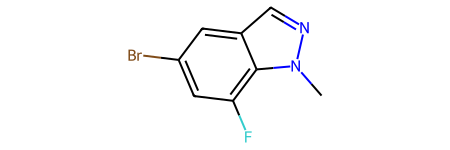

In [9]:
product = PRODUCT_STRUCTURE[0]
rdkit.Chem.MolFromSmiles(product)

**Question (1): Use the code above to extract the product of row index 500 then use the `rdkit.Chem.MolFromSmiles()` function to find its display formula. Note, you do not need to repeat the first line as we have already created our variable.**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [12]:
## ADD TEXT HERE


Here we will now extract individual columns from the dataset for reactant 1 and reactant 2, and as before we're going to save out the results for both reactants to two separate names for easier access:

In [14]:
Reactant_1_ID = data["Reactant_1_ID"]
Reactant_2_ID = data["Reactant_2_ID"]
Solvent_1_Name = data["Solvent_1_Name"]
Reagent_1_Short_Hand = data["Reagent_1_Short_Hand"]

We can also do something called _filtering_, where we can extract the data from a particular column that only meets the conditions we pose.

For example, from looking at the data in the original file, we can see there are many different reactant 1s and reactant 2s. We can filter out the data so that the only reactant 1 present is `MFCD18381159`, and the only reactant 2 present is `MFCD00008416`. This will make it easier to compare other factors while keeping the reactants the same.

In [15]:
r1 = Reactant_1_ID[(Reactant_1_ID == "MFCD18381159") & (Reactant_2_ID == "MFCD00008416") & (Solvent_1_Name == "MeCN")]
r2 = Reactant_2_ID[(Reactant_1_ID == "MFCD18381159") & (Reactant_2_ID == "MFCD00008416") & (Solvent_1_Name == "MeCN")]

We will do the same for the reagent and product yield columns - for now we will use the `Product_Yield_PCT_Area_UV` column as our measure for the yield:

In [16]:
Reagent_1_Short_Hand = data["Reagent_1_Short_Hand"]
reagent = Reagent_1_Short_Hand[(Reactant_1_ID == "MFCD18381159") & (Reactant_2_ID == "MFCD00008416") & (Solvent_1_Name == "MeCN")]
Product_Yield_PCT_Area_UV = data["Product_Yield_PCT_Area_UV"]
yield_uv = Product_Yield_PCT_Area_UV[(Reactant_1_ID == "MFCD18381159") & (Reactant_2_ID == "MFCD00008416") & (Solvent_1_Name == "MeCN")]

There are many ways to visualise data in Python (e.g. line graphs, scatter plots, bar charts) however it depends on what type of data you have. There are multiple different libraries that can be used to plot these graphs but as an example we will use `seaborn`. `seaborn` is a library for making statistical graphics - it builds on top of `matplotlib` and integrates closely with `pandas` data structures. (more information here: https://seaborn.pydata.org/tutorial/introduction)

Here we are comparing the type of reagent (a `string` data type) with the yield (a `float` data type) and there is a 1:1 ratio between the each ligands used and the number of experiments run with each one. Therefore, it is best to use a bar chart.

(Bar plot - shows the mean yield with the variability: https://seaborn.pydata.org/generated/seaborn.barplot.html)

Let's try to plot this as a whole:

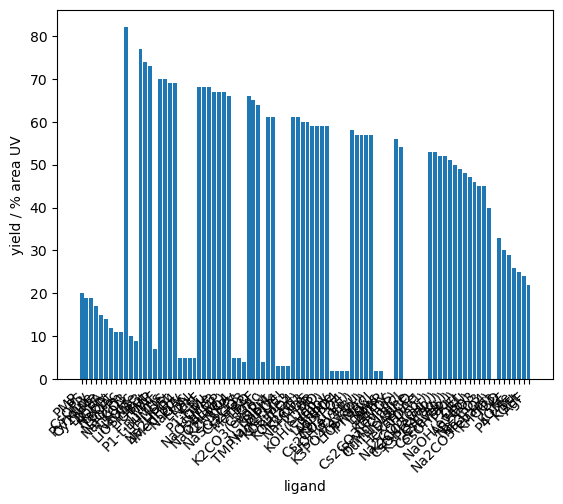

In [21]:
plt.bar(reagent, yield_uv)
plt.xlabel("ligand")
plt.ylabel("yield / % area UV")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

We can see that due to the large size of the dataset, the axis labels are all squashed together and it's dificult to tell which bar belongs to which reagent. However, we can see that the highest yields appear to show up in the first 20 bars or so. We can use indexing, as we did above, to 'zoom in' on this data.

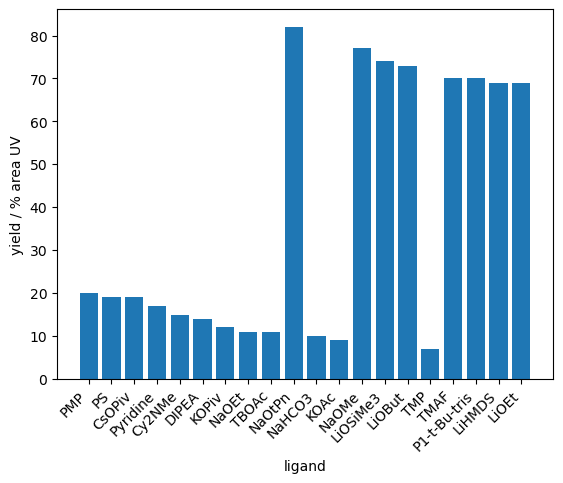

In [23]:
plt.bar(reagent[:20], yield_uv[:20]) # colon basically means 'all the data up until index 20'
plt.xlabel("reagent")
plt.ylabel("yield / % area UV")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

Which reagent seems to get the best yield here?

We can now do the same thing but using the `Product_Yield_Mass_Ion_Count` column as our measure for yield.

In [25]:
Product_Yield_Mass_Ion_Count = data["Product_Yield_Mass_Ion_Count"]
yield_ion = Product_Yield_Mass_Ion_Count[(Reactant_1_ID == "MFCD18381159") & (Reactant_2_ID == "MFCD00008416") & (Solvent_1_Name == "MeCN")]

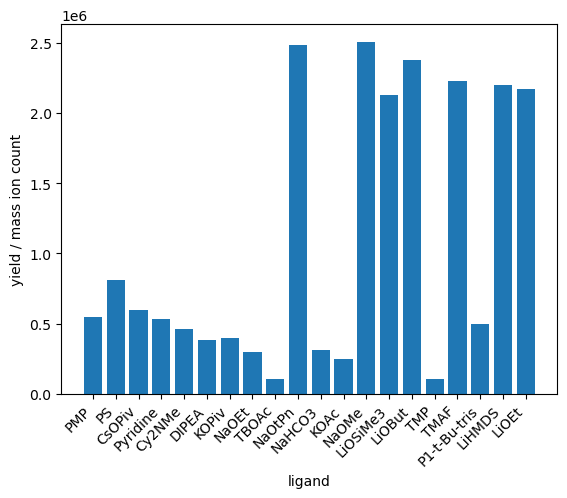

In [26]:
plt.bar(reagent[:20], yield_ion[:20])
plt.xlabel("reagent")
plt.ylabel("yield / mass ion count")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

How do the data from the different measures of yield differ?